In [4]:
import weka.core.jvm as jvm
jvm.start()
help(jvm.start)
help(jvm.stop)

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Help on function start in module weka.core.jvm:

start(class_path=None, bundled=True, packages=False, system_cp=False, max_heap_size=None, system_info=False)
    Initializes the javabridge connection (starts up the JVM).
    
    :param class_path: the additional classpath elements to add
    :type class_path: list
    :param bundled: whether to add jars from the "lib" directory
    :type bundled: bool
    :param packages: whether to add jars from Weka packages as well (bool) or an alternative Weka home directory (str)
    :type packages: bool or str
    :param system_cp: whether to add the system classpath as well
    :type system_cp: bool
    :param max_heap_size: the maximum heap size (-Xmx parameter, eg 512m or 4g)
    :type max_heap_size: str
    :param system_info: whether to print the system info (generated by weka.core.SystemInfo)
    :type system_info: bool

Help on function stop in module weka.core.jvm:

stop()
    Kills the JVM.



COD MODELO LMT

In [ ]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
from weka.core.stemmers import Stemmer
from weka.core.stopwords import Stopwords
from weka.core.tokenizers import Tokenizer
from weka.filters import Filter, MultiFilter, StringToWordVector
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

# build classifier
helper.print_title("MODELO LMT")
cls = Classifier(classname="weka.classifiers.trees.LMT") 
cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC LMT", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

 
#Codigo para sacar la informaicón csv
#helper.print_title("recording/outputting predictions separately")
#outputfile = datasrc + "/LMTM.csv"
#output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution", "-suppress", "-file", outputfile])
#output.header = test
#output.print_all(cls, test)
#helper.print_info("Predictions stored in: " + outputfile)
# by using "-suppress" we don't store the output in memory, the following statement won't output anything
#print(output.buffer_content())


Loading dataset: C:\Users\Fidelina Villa\Documents\train\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

MODELO LMT


COD MODELO NAIVE BAYES


Loading dataset: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

MODELO NAIVE BAYES

recording predictions in-memory

Correctly Classified Instances         123               35.0427 %
Incorrectly Classified Instances       228               64.9573 %
Kappa statistic                          0.0358
Mean absolute error                      0.6501
Root mean squared error                  0.7943
Relative absolute error                711.5456 %
Root relative squared error            370.0044 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,320    0,059    0,991      0,320    0,484      0,122    0,730     0,977     0
                 0,941    0,680    0,066      0,941    0,123      0,122    0,725     0,183     1
Weighted Avg.    0,350    0,0

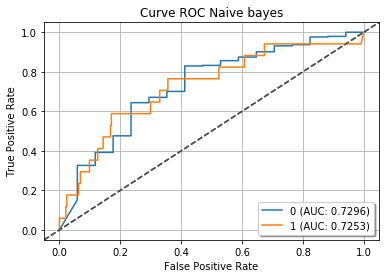

In [3]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

# build classifier
helper.print_title("MODELO NAIVE BAYES")
cls = classifier = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Naive bayes", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD SIMPLELOGISTIC


Loading dataset: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

simple logistic

recording predictions in-memory

Correctly Classified Instances         336               95.7265 %
Incorrectly Classified Instances        15                4.2735 %
Kappa statistic                          0.2024
Mean absolute error                      0.1677
Root mean squared error                  0.223 
Relative absolute error                183.5539 %
Root relative squared error            103.8661 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    0,882    0,957      1,000    0,978      0,336    0,559     0,957     0
                 0,118    0,000    1,000      0,118    0,211      0,336    0,559     0,160     1
Weighted Avg.    0,957    0,840 

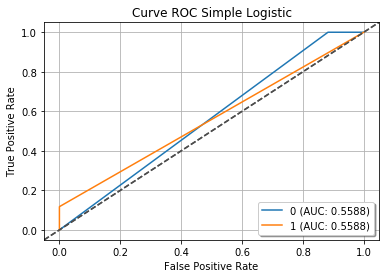

In [44]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

# build classifier
helper.print_title("simple logistic")
cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Simple Logistic", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD SMO POLINOMICO


Loading dataset: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

SMO polinomico

recording predictions in-memory

Correctly Classified Instances         333               94.8718 %
Incorrectly Classified Instances        18                5.1282 %
Kappa statistic                          0.3317
Mean absolute error                      0.0517
Root mean squared error                  0.2263
Relative absolute error                 56.6135 %
Root relative squared error            105.4069 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,982    0,706    0,965      0,982    0,973      0,340    0,711     0,972     0
                 0,294    0,018    0,455      0,294    0,357      0,340    0,839     0,285     1
Weighted Avg.    0,949    0,673  

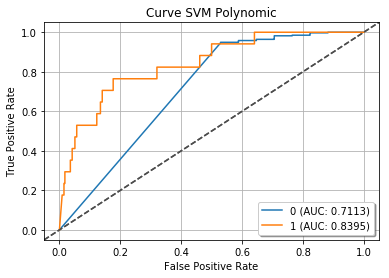

In [54]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("SMO polinomico")
#cmdline = 'weka.classifiers.functions.SMO -K "weka.classifiers.functions.supportVector.NormalizedPolyKernel -E 1.0"'
#cls = from_commandline(cmdline, classname="weka.classifiers.Classifier")
#cls.build_classifier(train)
kernel = Kernel(classname="weka.classifiers.functions.supportVector.PolyKernel", options=["-E", "1.0"])
cls = KernelClassifier(classname="weka.classifiers.functions.SMO",options=["-M"])
cls.kernel = kernel
cls.build_classifier(train)


# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve SVM Polynomic", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())


Loading dataset: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

SMO kenerl Radial

recording predictions in-memory

Correctly Classified Instances         334               95.1567 %
Incorrectly Classified Instances        17                4.8433 %
Kappa statistic                          0.3469
Mean absolute error                      0.0566
Root mean squared error                  0.213 
Relative absolute error                 61.9139 %
Root relative squared error             99.2087 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,985    0,706    0,965      0,985    0,975      0,360    0,829     0,989     0
                 0,294    0,015    0,500      0,294    0,370      0,360    0,829     0,352     1
Weighted Avg.    0,952    0,67

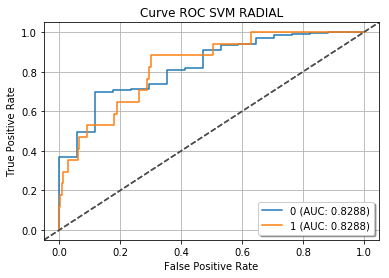

In [51]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("SMO kenerl Radial")
kernel = Kernel(classname="weka.classifiers.functions.supportVector.RBFKernel", options=["-G", "0.001"])
cls = KernelClassifier(classname="weka.classifiers.functions.SMO",options=["-M"])
#cls = KernelClassifier(classname="weka.classifiers.functions.SMO", options=["-M"])
cls.kernel = kernel
cls.build_classifier(train)

# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC SVM RADIAL", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD KNN IBK


Loading dataset: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

creating KNN IBk
IB1 instance-based classifier
using 5 nearest neighbour(s) for classification


recording predictions in-memory

Correctly Classified Instances         335               95.4416 %
Incorrectly Classified Instances        16                4.5584 %
Kappa statistic                          0.2564
Mean absolute error                      0.0668
Root mean squared error                  0.2039
Relative absolute error                 73.1539 %
Root relative squared error             94.9939 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,994    0,824    0,960      0,994    0,976      0,309    0,743     0,975     0
                 0,176    0,006    0,600      0,1

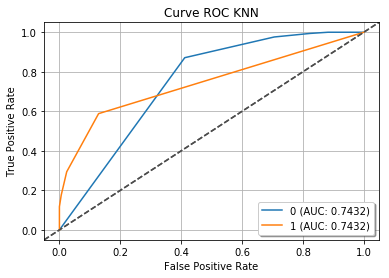

In [49]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

# generate train/test split of randomized data
#train, test = data.train_test_split(66.0, Random(1)) # test true to J48
#train, test = data.train_test_split(66.0, Random(1)) # test true to J48
#train, test = data.train_test_split(66.0, Random(1))
train = data
test = dataTest

# build classifier
helper.print_title("creating KNN IBk")
cls = Classifier(classname="weka.classifiers.lazy.IBk",options=["-K", "5"]) 
cls.build_classifier(train)
print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC KNN", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

In [ ]:
COD BAGGING 


Loading dataset: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

Creating Bagging
Bagging with 10 iterations and base learner

weka.classifiers.trees.REPTree -M 2 -V 0.001 -N 3 -S 1 -L -1 -I 0.0

recording predictions in-memory

Correctly Classified Instances         332               94.5869 %
Incorrectly Classified Instances        19                5.4131 %
Kappa statistic                         -0.0103
Mean absolute error                      0.0857
Root mean squared error                  0.2229
Relative absolute error                 93.7549 %
Root relative squared error            103.8345 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,994    1,000    0,951      0,994    0,972      -0,017   0,572     0,958     0
               

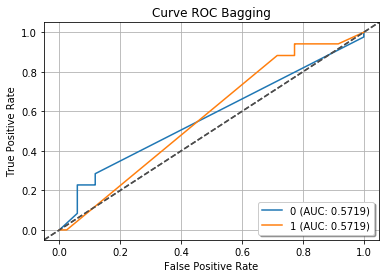

In [57]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("Creating Bagging")
cls = Classifier(classname="weka.classifiers.meta.Bagging",options=["-S", "1"])
cls.build_classifier(train)
print(cls)

# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Bagging", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD Random Forest


Loading dataset: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\ORIGINAL\Test.arff

Creating Random Forest
RandomForest

Bagging with 100 iterations and base learner

weka.classifiers.trees.RandomTree -K 0 -M 1.0 -V 0.001 -S 4 -do-not-check-capabilities

recording predictions in-memory

Correctly Classified Instances         336               95.7265 %
Incorrectly Classified Instances        15                4.2735 %
Kappa statistic                          0.2024
Mean absolute error                      0.0784
Root mean squared error                  0.2019
Relative absolute error                 85.8079 %
Root relative squared error             94.0579 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    0,882    0,957      1,000    0,978      0,336 

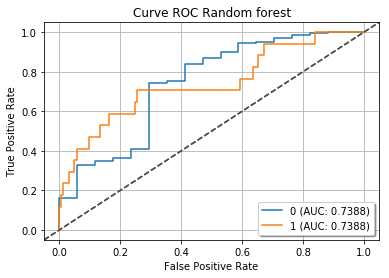

In [40]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\ORIGINAL\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("Creating Random Forest")
cls = Classifier(classname="weka.classifiers.trees.RandomForest",options=["-S", "4"]) 
cls.build_classifier(train)
print(cls)

# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Random forest", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#helper.print_info("Predictions:")
#linea que muestra la predicciones
#print(output.buffer_content())
